## This notebook is to compare SS concentrations from the LISST to turbidity measurements from the sondes

### Import and cleanup data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

# directories where the CSV files are stored
down_turbidities = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/turbidity_down'
up_turbidities = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/turbidity_up'
down_constituents = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/constituents_down'
up_constituents = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/constituents_up'
depths = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth'
LANL_direct = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/LANL_SS'

# dictionaries to store the data frames
turbidity_down = {}
turbidity_up = {}
SS_down = {}
SS_up = {}
depth = {}

# import the LANL SS data 
LANL_SS = pd.read_csv(LANL_direct + '/SS_LANL.csv')

# iterate over all files in the directory

# turbidity data
for filename in os.listdir(down_turbidities):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(down_turbidities, filename)     # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['DateTime'])                 # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['DateTime'])    # convert to datetime format
        df = df.drop(columns=['DateTime'])                  # drop the original 'DateTime' column
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)                              
        turbidity_down[key] = df                                 # store the data frame in the dictionary
for filename in os.listdir(up_turbidities):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(up_turbidities, filename)     # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['DateTime'])                 # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['DateTime'])    # convert to datetime format
        df = df.drop(columns=['DateTime'])                  # drop the original 'DateTime' column
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)                              
        turbidity_up[key] = df                                 # store the data frame in the dictionary

# constituents data
for filename in os.listdir(down_constituents):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(down_constituents, filename)    # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)
        SS_down[key] = df                                        # store the data frame in the dictionary
for filename in os.listdir(up_constituents):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(up_constituents, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)
        SS_up[key] = df                                     # store the data frame in the dictionary

for filename in os.listdir(depths):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(depths, filename)          # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        depth[key] = df                                    # store the data frame in the dictionary

### Composite the dictionaries into one big data frame

In [4]:
# composite turbdity data
# concatenate all dataframes into one
down_turb = pd.concat(turbidity_down.values())
up_turb = pd.concat(turbidity_up.values())
# sort the dataframe by date
down_turb = down_turb.sort_index()
up_turb = up_turb.sort_index()
# drop QualifierID
down_turb = down_turb.drop(columns=['QualifierID'])
up_turb = up_turb.drop(columns=['QualifierID'])
# change DataValue name to Turbidity
down_turb = down_turb.rename(columns={'DataValue':'Turbidity'})
up_turb = up_turb.rename(columns={'DataValue':'Turbidity'})
# resample the data to 1 minute intervals
down_turb = down_turb.resample('1T').interpolate()  
up_turb = up_turb.resample('1T').interpolate()  

up_turb

,Turbidity
Date_Time,
2021-07-16 14:30:00,4.620
2021-07-16 14:31:00,4.594
2021-07-16 14:32:00,4.568
2021-07-16 14:33:00,4.542
2021-07-16 14:34:00,4.516
...,...
2023-09-19 23:41:00,2.068
2023-09-19 23:42:00,2.066
2023-09-19 23:43:00,2.064


In [3]:
# composite constituent data
# concatenate all dataframes into one
down_SS = pd.concat(SS_down.values())
up_SS = pd.concat(SS_up.values())
# sort the dataframe by date
down_SS = down_SS.sort_index()
up_SS = up_SS.sort_index()
# drop all columns except for SS (uL/L)
down_SS = down_SS[['SS (uL/L)']]
up_SS = up_SS[['SS (uL/L)']]

### Now we will merge the water depths and SS values 

In [4]:
# merge on the date (index)
down_turb = down_turb.merge(down_SS, left_index=True, right_index=True, how='left')
up_turb = up_turb.merge(up_SS, left_index=True, right_index=True, how='left')

# drop all rows that has no SS data 
down_turb = down_turb.dropna(subset=['SS (uL/L)'])
up_turb = up_turb.dropna(subset=['SS (uL/L)'])

down_turb

,Turbidity,SS (uL/L)
Date_Time,,
2021-07-23 15:50:00,88.960800,339.78248
2021-07-23 16:09:00,295.588800,457.12000
2021-07-23 16:40:00,75.484000,152.79000
2021-07-23 16:55:00,69.550000,168.45000
2021-07-23 19:19:00,22.234000,43.15000
...,...,...
2023-09-14 18:07:00,1.613632,75.40000
2023-09-14 18:22:00,1.609706,70.75000
2023-09-14 18:27:00,1.608398,61.61000


Getting rid of values that are 0 or lower

In [5]:
# drop all rows with negative values
down_turb = down_turb[down_turb['Turbidity'] > 0]
up_turb = up_turb[up_turb['Turbidity'] > 0]
# drop all SS values that are 0
down_turb = down_turb[down_turb['SS (uL/L)'] > 0]
up_turb = up_turb[up_turb['SS (uL/L)'] > 0]

In [6]:
# export as csv
down_turb.to_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/down_turbidity_LISST.csv')
up_turb.to_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/up_turbidity_LISST.csv')

## Plot Turbidity and SS for the entire record 

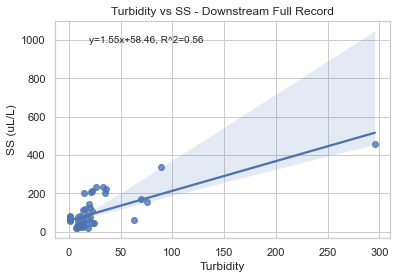

In [7]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb['Turbidity'], down_turb['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Full Record')

# Show the plot
plt.savefig('turb_vs_SS_down.png')
plt.show()


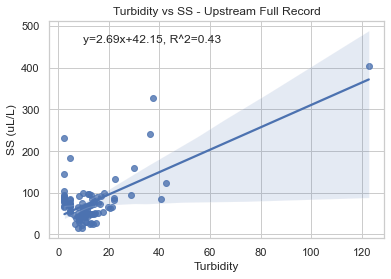

In [8]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb['Turbidity'], up_turb['SS (uL/L)'])

# Create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)
# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Full Record')

# Show the plot
plt.savefig('turb_vs_SS_up.png')
plt.show()


# Separation by Season

Spring 2023

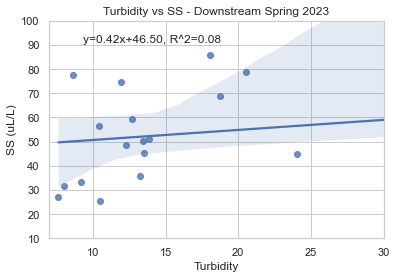

In [26]:
# plot the downstream data only in spring 2023
down_turb_spring = down_turb.loc['2023-03-01':'2023-05-31']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_spring['Turbidity'], down_turb_spring['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb_spring)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlim(7,30)
plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023')

# Show the plot
plt.savefig('turb_vs_SS_down_spring2023.png')
plt.show()

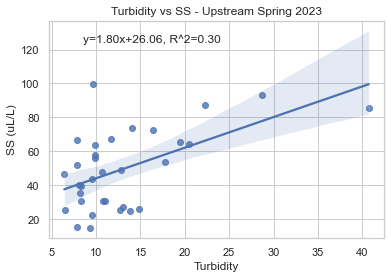

In [27]:
# plot the downstream data only in spring 2023
up_turb_spring = up_turb.loc['2023-03-01':'2023-05-31']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb_spring['Turbidity'], up_turb_spring['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up_turb_spring)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023')

# Show the plot
plt.savefig('turb_vs_SS_up_spring2023.png')
plt.show()

Summer 2023

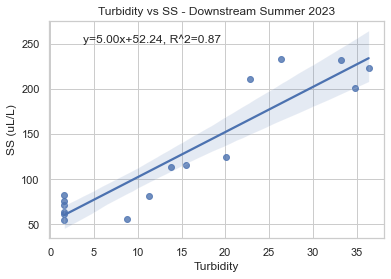

In [28]:
# plot the downstream data only in summer 2023
down_turb_summer = down_turb.loc['2023-06-01':'2023-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_summer['Turbidity'], down_turb_summer['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer 2023')

# Show the plot
plt.savefig('turb_vs_SS_down_summer2023.png')
plt.show()

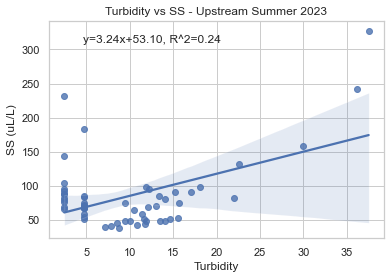

In [29]:
# plot the downstream data only in summer 2023
up_turb_summer = up_turb.loc['2023-06-01':'2023-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb_summer['Turbidity'], up_turb_summer['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer 2023')

# Show the plot
plt.savefig('turb_vs_SS_up_summer2023.png')
plt.show()

Spring 2022 - no SS data 

Summer 2022 - No upstream data

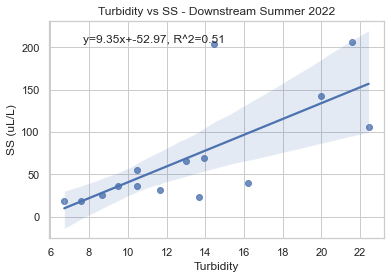

In [40]:
# plot the downstream data only in summer 2022
down_turb_summer = down_turb.loc['2022-06-01':'2022-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_summer['Turbidity'], down_turb_summer['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer 2022')

# Show the plot
plt.savefig('turb_vs_SS_up_summer2022.png')
plt.show()

Summer 2021

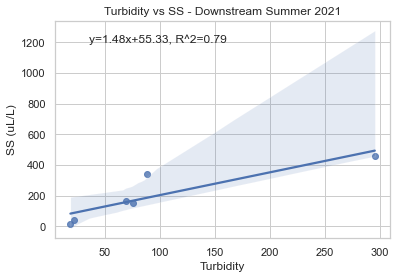

In [44]:
# plot the downstream data only in summer 2022
down_turb_summer = down_turb.loc['2021-06-01':'2021-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_summer['Turbidity'], down_turb_summer['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer 2021')

# Show the plot
plt.savefig('turb_vs_SS_down_summer2021.png')
plt.show()

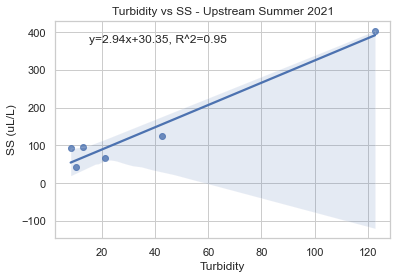

In [45]:
# plot the downstream data only in summer 2022
up_turb_summer = up_turb.loc['2021-06-01':'2021-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb_summer['Turbidity'], up_turb_summer['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer 2021')

# Show the plot
plt.savefig('turb_vs_SS_up_summer2021.png')
plt.show()

# Separation by high flow event

### Spring Events

Event 0: Only upstream sonde

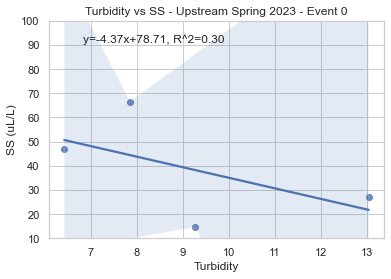

In [57]:
up1 = up_turb.loc['2023-04-24':'2023-04-25']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023 - Event 0')

# Show the plot
plt.savefig('up_spring2023_event0.png')
plt.show()

Event 1

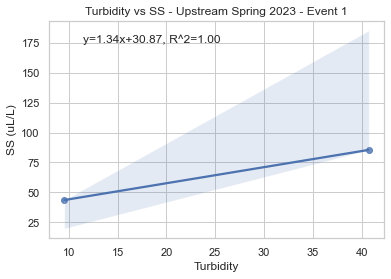

In [58]:
up1 = up_turb.loc['2023-04-30':'2023-05-01 12:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023 - Event 1')

# Show the plot
plt.savefig('up_spring2023_event1.png')
plt.show()

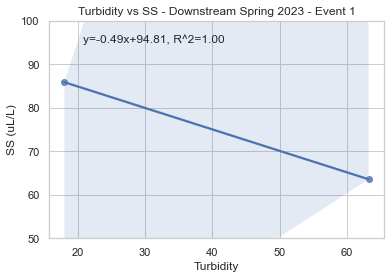

In [61]:
down1 = down_turb.loc['2023-04-30 10:00:00':'2023-05-01 03:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
plt.ylim(50,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023 - Event 1')

# Show the plot
plt.savefig('down_spring2023_event1.png')
plt.show()

Event 2

c:\Users\huck4481\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Users\huck4481\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\huck4481\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


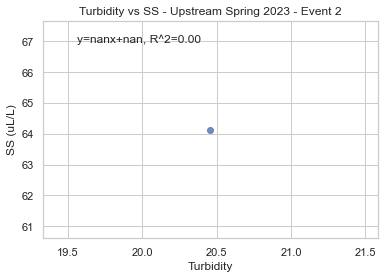

In [64]:
up1 = up_turb.loc['2023-05-01 10:00:00':'2023-05-02 12:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023 - Event 2')

# Show the plot
plt.savefig('up_spring2023_event2.png')
plt.show()

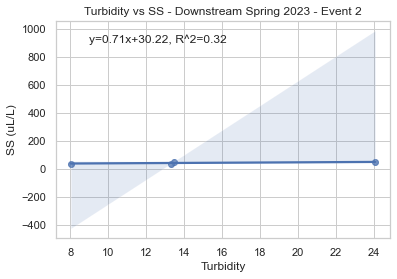

In [66]:
down1 = down_turb.loc['2023-05-01 9:00:00':'2023-05-02 12:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(50,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023 - Event 2')

# Show the plot
plt.savefig('down_spring2023_event2.png')
plt.show()

Event 3

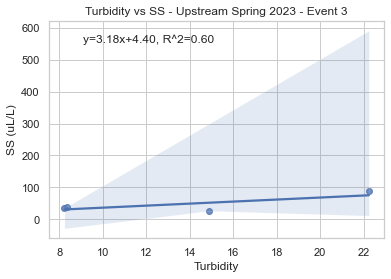

In [67]:
up1 = up_turb.loc['2023-05-03 11:00:00':'2023-05-04 11:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023 - Event 3')

# Show the plot
plt.savefig('up_spring2023_event3.png')
plt.show()

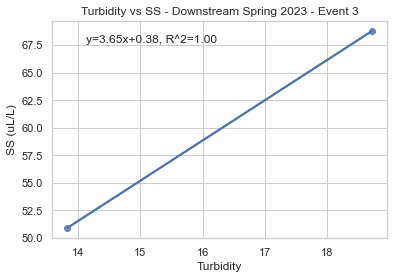

In [72]:
down1 = down_turb.loc['2023-05-03 05:00:00':'2023-05-04 18:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(50,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023 - Event 3')

# Show the plot
plt.savefig('down_spring2023_event3.png')
plt.show()

Event 4

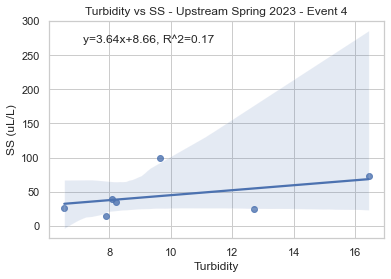

In [77]:
up1 = up_turb.loc['2023-05-04 10:00:00':'2023-05-05 11:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023 - Event 4')

# Show the plot
plt.savefig('up_spring2023_event4.png')
plt.show()

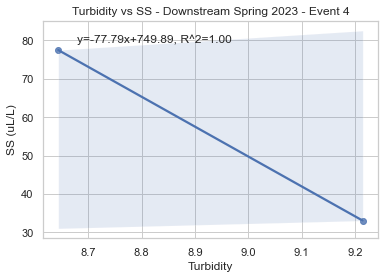

In [79]:
down1 = down_turb.loc['2023-05-04 14:00:00':'2023-05-05 5:00:00']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(50,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023 - Event 4')

# Show the plot
plt.savefig('down_spring2023_event4.png')
plt.show()

### Summer Storms

Storm 1

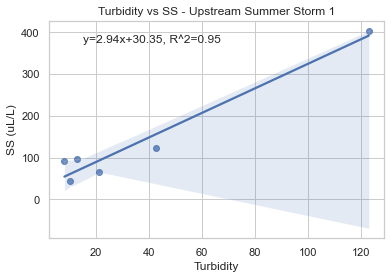

In [80]:
up1 = up_turb.loc['2021-07-23':'2021-07-24']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer Storm 1')

# Show the plot
plt.savefig('up_summer_storm1.png')
plt.show()

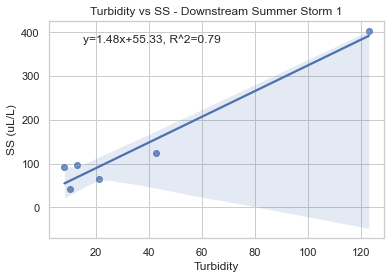

In [82]:
down1 = down_turb.loc['2021-07-23':'2021-07-24']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 1')

# Show the plot
plt.savefig('down_summer_storm1.png')
plt.show()

Storm 2 - no upstream data

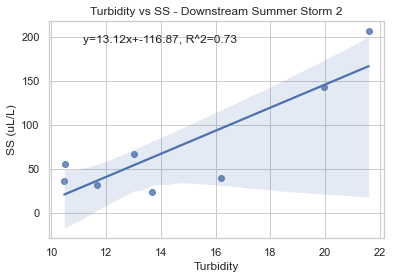

In [84]:
down1 = down_turb.loc['2022-08-03':'2022-08-04']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 2')

# Show the plot
plt.savefig('down_summer_storm2.png')
plt.show()

Storm 3 - no upstream data

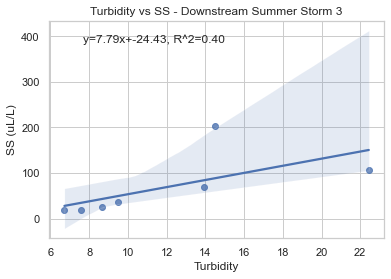

In [85]:
down1 = down_turb.loc['2022-08-08':'2022-08-09']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 3')

# Show the plot
plt.savefig('down_summer_storm3.png')
plt.show()

Storm 4

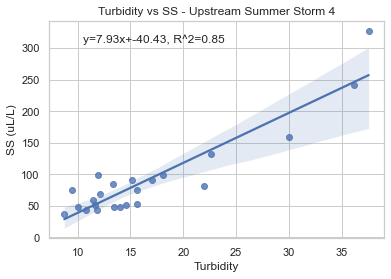

In [86]:
up1 = up_turb.loc['2023-07-29':'2023-07-30']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer Storm 4')

# Show the plot
plt.savefig('up_summer_storm4.png')
plt.show()

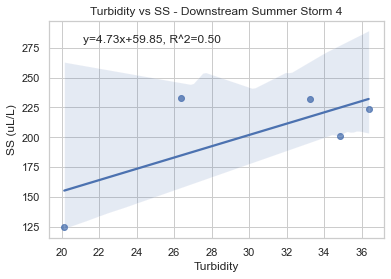

In [87]:
down1 = down_turb.loc['2023-07-29':'2023-07-30']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 4')

# Show the plot
plt.savefig('down_summer_storm4.png')
plt.show()

Storm 5 - no upstream data

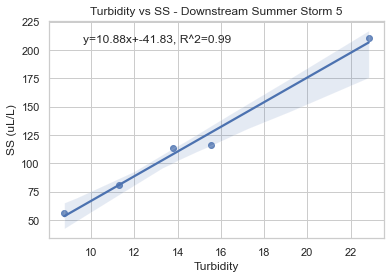

In [90]:
down1 = down_turb.loc['2023-08-13':'2023-08-13']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 5')

# Show the plot
plt.savefig('down_summer_storm5.png')
plt.show()

Storm 6 - no downstream data

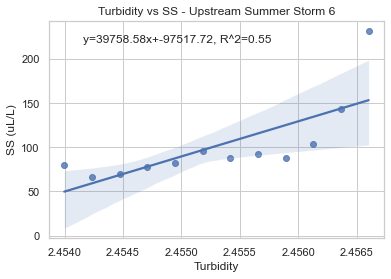

In [93]:
up1 = up_turb.loc['2023-08-28':'2023-08-29']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer Storm 6')

# Show the plot
plt.savefig('up_summer_storm6.png')
plt.show()

Storm 7

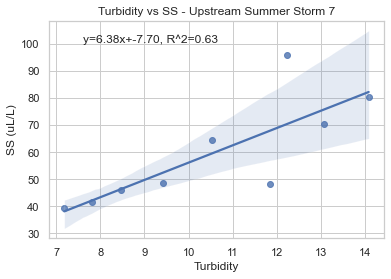

In [94]:
up1 = up_turb.loc['2023-09-14':'2023-09-15']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up1['Turbidity'], up1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer Storm 7')

# Show the plot
plt.savefig('up_summer_storm7.png')
plt.show()

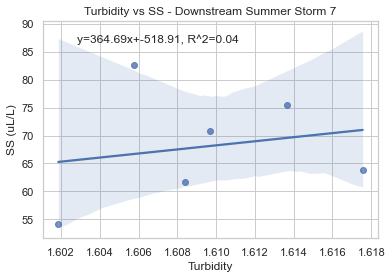

In [95]:
down1 = down_turb.loc['2023-09-14':'2023-09-14']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down1['Turbidity'], down1['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down1)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Summer Storm 7')

# Show the plot
plt.savefig('down_summer_storm7.png')
plt.show()

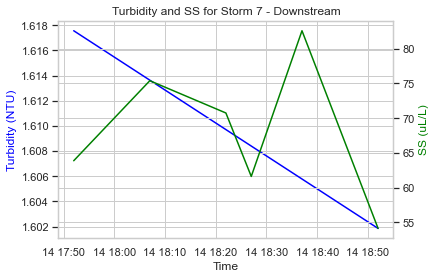

In [103]:
# plot time series of turbidity and SS for storm 7
down1 = down_turb.loc['2023-09-14':'2023-09-15']
up1 = up_turb.loc['2023-09-14':'2023-09-15']

# create a figure and axis
fig, ax1 = plt.subplots()
# plot turbidity for downstream and upstream on first y-axis
ax1.plot(down1.index, down1['Turbidity'], color='blue', label='Downstream Turbidity')
ax2 = ax1.twinx()
# plot SS for downstream and upstream on second y-axis
ax2.plot(down1.index, down1['SS (uL/L)'], color='green', label='Downstream SS')
# set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Turbidity (NTU)', color='blue')
ax2.set_ylabel('SS (uL/L)', color='green')
plt.title('Turbidity and SS for Storm 7 - Downstream')

# show the plot
plt.show()

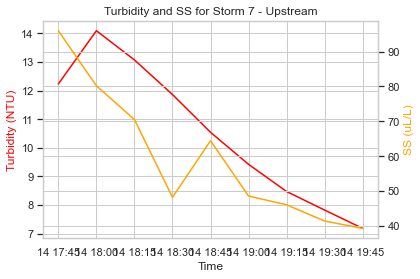

In [104]:
# plot time series of turbidity and SS for storm 7
down1 = down_turb.loc['2023-09-14':'2023-09-15']
up1 = up_turb.loc['2023-09-14':'2023-09-15']

# create a figure and axis
fig, ax1 = plt.subplots()
# plot turbidity for downstream and upstream on first y-axis
ax1.plot(up1.index, up1['Turbidity'], color='red', label='Upstream Turbidity')
# create second y-axis
ax2 = ax1.twinx()
# plot SS for downstream and upstream on second y-axis
ax2.plot(up1.index, up1['SS (uL/L)'], color='orange', label='Upstream SS')
# set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Turbidity (NTU)', color='red')
ax2.set_ylabel('SS (uL/L)', color='orange')
plt.title('Turbidity and SS for Storm 7 - Upstream')

# show the plot
plt.show()

# Same thing but using the LANL data (in mg/L)

Merge LANL suspended sediment with original constituents

In [3]:
# iterate over the dictionary items
for key, df in SS_down.items():
    # check if 'LAB_ID' is in the columns of the dataframe
    if 'LAB_ID' in df.columns:
        # convert 'LAB_ID' to string in both dataframes
        df['LAB_ID'] = df['LAB_ID'].astype(str)  
        LANL_SS['LAB_ID'] = LANL_SS['LAB_ID'].astype(str)
        # set 'LAB_ID' as index temporarily for the merge
        df.reset_index(inplace=True) # reset the index to make 'Date_Time' a column
        df.set_index('LAB_ID', inplace=True) 
        # merge the dataframe with LANL_SS on 'LAB_ID'
        merged_df = df.merge(LANL_SS, on='LAB_ID', how='left') 
        # convert 'Date_Time' to datetime and reset the index back to 'Date_Time'
        merged_df['Date_Time'] = pd.to_datetime(merged_df['Date_Time'])
        SS_down[key] = merged_df.set_index('Date_Time')

# repeat the process for the SS_up dictionary
for key, df in SS_up.items():
    if 'LAB_ID' in df.columns:
        df['LAB_ID'] = df['LAB_ID'].astype(str)
        df.reset_index(inplace=True)
        df.set_index('LAB_ID', inplace=True)
        merged_df = df.merge(LANL_SS, on='LAB_ID', how='left')
        # convert 'Date_Time' to datetime and reset the index back to 'Date_Time'
        merged_df['Date_Time'] = pd.to_datetime(merged_df['Date_Time'])
        SS_up[key] = merged_df.set_index('Date_Time')

In [4]:
# iterate over the dictionary items and convert index to Timestamp
for key, df in SS_down.items():
    df.index = pd.to_datetime(df.index)
for key, df in SS_up.items():
    df.index = pd.to_datetime(df.index)

# composite constituent LANL SS data
# concatenate all dataframes into one
down_SS_LANL = pd.concat(SS_down.values())
up_SS_LANL = pd.concat(SS_up.values())

# sort the dataframe by date
down_SS_LANL = down_SS_LANL.sort_index()
up_SS_LANL = up_SS_LANL.sort_index()

# drop all columns except for SS (uL/L)
down_SS_LANL = down_SS_LANL[['sediment']]
up_SS_LANL = up_SS_LANL[['sediment']]

# drop all nan values
down_SS_LANL = down_SS_LANL.dropna()
up_SS_LANL = up_SS_LANL.dropna()


Merge the sediment and turbidity samples

In [5]:
# merge on the date (index)
down_turb = down_turb.merge(down_SS_LANL, left_index=True, right_index=True, how='left')
up_turb = up_turb.merge(up_SS_LANL, left_index=True, right_index=True, how='left')

# drop all rows that has no SS data 
down_turb = down_turb.dropna(subset=['sediment'])
up_turb = up_turb.dropna(subset=['sediment'])

down_turb

,Turbidity,sediment
Date_Time,,
2022-08-03 15:02:00,21.590000,57.73
2022-08-03 15:17:00,19.968000,48.06
2022-08-03 15:47:00,10.484000,17.43
2022-08-03 16:17:00,13.014000,11.45
2022-08-03 18:02:00,9.666000,55.00
...,...,...
2023-09-14 18:07:00,1.613632,31.54
2023-09-14 18:22:00,1.609706,28.08
2023-09-14 18:37:00,1.605781,23.60


Getting rid of values that are 0 or lower

In [7]:
# drop all rows with negative values
down_turb = down_turb[down_turb['Turbidity'] > 0]
up_turb = up_turb[up_turb['Turbidity'] > 0]
# drop all SS values that are 0
down_turb = down_turb[down_turb['sediment'] > 0]
up_turb = up_turb[up_turb['sediment'] > 0]

## Plot turbidity and LANL SS - full record

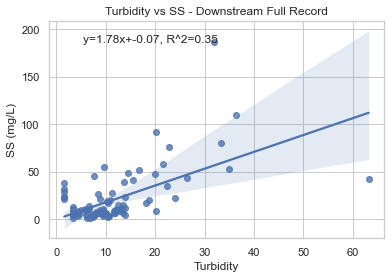

In [11]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb['Turbidity'], down_turb['sediment'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=down_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (mg/L)')
plt.title('Turbidity vs SS - Downstream Full Record')

# Show the plot
plt.savefig('turb_vs_SS_down_LANL.png')
plt.show()

# export the data to a csv file
down_turb.to_csv('down_LANL.csv')
up_turb.to_csv('up_LANL.csv')

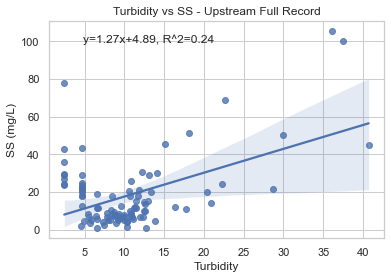

In [14]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb['Turbidity'], up_turb['sediment'])

# Create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=up_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)
# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (mg/L)')
plt.title('Turbidity vs SS - Upstream Full Record')

# Show the plot
plt.savefig('turb_vs_SS_up_LANL.png')
plt.show()

# Separation by Season 

Spring 2023

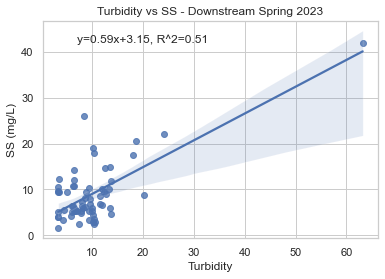

In [16]:
# plot the downstream data only in spring 2023
down_turb_spring = down_turb.loc['2023-03-01':'2023-05-31']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_spring['Turbidity'], down_turb_spring['sediment'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=down_turb_spring)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (mg/L)')
plt.title('Turbidity vs SS - Downstream Spring 2023')

# Show the plot
plt.savefig('turb_vs_SS_down_spring2023_LANL.png')
plt.show()

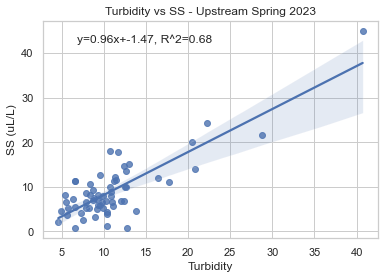

In [17]:
# plot the downstream data only in spring 2023
up_turb_spring = up_turb.loc['2023-03-01':'2023-05-31']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb_spring['Turbidity'], up_turb_spring['sediment'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=up_turb_spring)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (mg/L)')
plt.title('Turbidity vs SS - Upstream Spring 2023')

# Show the plot
plt.savefig('turb_vs_SS_up_spring2023_LANL.png')
plt.show()

Summer 2023

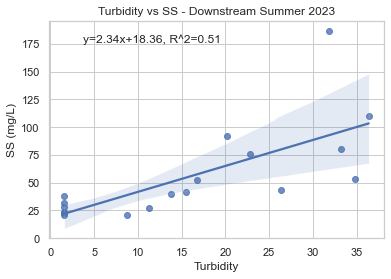

In [19]:
# plot the downstream data only in summer 2023
down_turb_summer = down_turb.loc['2023-06-01':'2023-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb_summer['Turbidity'], down_turb_summer['sediment'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=down_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (mg/L)')
plt.title('Turbidity vs SS - Downstream Summer 2023')

# Show the plot
plt.savefig('turb_vs_SS_down_summer2023_LANL.png')
plt.show()

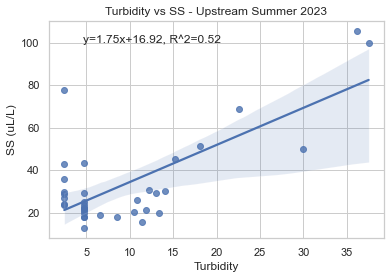

In [20]:
# plot the downstream data only in summer 2023
up_turb_summer = up_turb.loc['2023-06-01':'2023-09-20']

# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb_summer['Turbidity'], up_turb_summer['sediment'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='sediment', data=up_turb_summer)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
#plt.xlim(7,30)
#plt.ylim(10,100)
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Summer 2023')

# Show the plot
plt.savefig('turb_vs_SS_up_summer2023_LANL.png')
plt.show()

# Merging Turbidities Together

After importing all the data, I skipped all other cells and ran these to simplify the data analysis process

In [19]:
# composite turbdity data
# concatenate all dataframes into one
down_turb = pd.concat(turbidity_down.values())
up_turb = pd.concat(turbidity_up.values())
# sort the dataframe by date
down_turb = down_turb.sort_index()
up_turb = up_turb.sort_index()
# drop QualifierID
down_turb = down_turb.drop(columns=['QualifierID'])
up_turb = up_turb.drop(columns=['QualifierID'])
# change DataValue name to Turbidity
down_turb = down_turb.rename(columns={'DataValue':'down_turb'})
up_turb = up_turb.rename(columns={'DataValue':'up_turb'})
# merge both turbidity records 
turbidity = pd.concat([down_turb, up_turb], axis=1)


In [20]:
# separate by season 
# spring 2023
turbidity_spring = turbidity.loc['2023-03-01':'2023-05-31']
# resample the data to 1 minute intervals
turbidity_spring = turbidity_spring.resample('1T').interpolate()  
# resample 15 min intervals
turbidity_spring = turbidity_spring.resample('15T').mean()
# drop all rows with nan values
turbidity_spring = turbidity_spring.dropna()
# drop all -9999 values
turbidity_spring = turbidity_spring[turbidity_spring['down_turb'] > 0]
turbidity_spring = turbidity_spring[turbidity_spring['up_turb'] > 0]


# all summers
# 2021
turbidity_summer_2021 = turbidity.loc['2021-06-01':'2021-09-20']
turbidity_summer_2021 = turbidity_summer_2021.dropna() # drop all rows with nan values
turbidity_summer_2021 = turbidity_summer_2021[turbidity_summer_2021['down_turb'] > 0] # drop all -9999 values
turbidity_summer_2021 = turbidity_summer_2021[turbidity_summer_2021['up_turb'] > 0]
# 2022
turbidity_summer_2022 = turbidity.loc['2022-06-01':'2022-09-20']
turbidity_summer_2022 = turbidity_summer_2022.dropna() # drop all rows with nan values
turbidity_summer_2022 = turbidity_summer_2022[turbidity_summer_2022['down_turb'] > 0] # drop all -9999 values
turbidity_summer_2022 = turbidity_summer_2022[turbidity_summer_2022['up_turb'] > 0]
# 2023
turbidity_summer_2023 = turbidity.loc['2023-06-01':'2023-09-20']
turbidity_summer_2023 = turbidity_summer_2023.dropna() # drop all rows with nan values
turbidity_summer_2023 = turbidity_summer_2023[turbidity_summer_2023['down_turb'] > 0] # drop all -9999 values
turbidity_summer_2023 = turbidity_summer_2023[turbidity_summer_2023['up_turb'] > 0]
# concatenate all summer data into a new DataFrame
all_summers = pd.concat([turbidity_summer_2021, turbidity_summer_2022, turbidity_summer_2023])
# drop nan values
all_summers = all_summers.dropna()
# drop all -9999 values
all_summers = all_summers[all_summers['down_turb'] > 0]
all_summers = all_summers[all_summers['up_turb'] > 0]

### Plot Spring 2023 Relationship

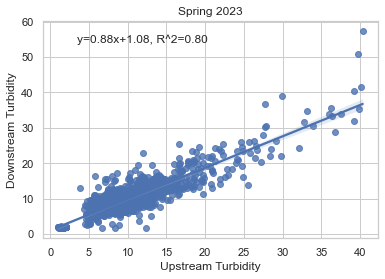

In [17]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_spring['up_turb'], turbidity_spring['down_turb'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='up_turb', y='down_turb', data=turbidity_spring)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Upstream Turbidity')
plt.ylabel('Downstream Turbidity')
plt.title('Spring 2023')

# Show the plot
plt.savefig('spring2023_turbidity_upvsdown.png')
plt.show()


### Plot Summer 2023 Relationship

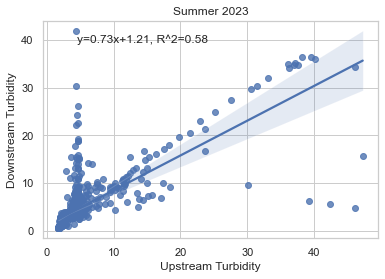

In [21]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_summer_2023['up_turb'], turbidity_summer_2023['down_turb'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='up_turb', y='down_turb', data=turbidity_summer_2023)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Upstream Turbidity')
plt.ylabel('Downstream Turbidity')
plt.title('Summer 2023')

# Show the plot
plt.savefig('summer2023_turbidity_upvsdown.png')
plt.show()

### All Summers

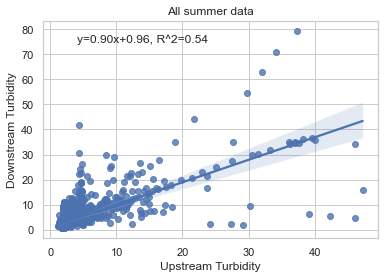

In [24]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(all_summers['up_turb'], all_summers['down_turb'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='up_turb', y='down_turb', data=all_summers)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Upstream Turbidity')
plt.ylabel('Downstream Turbidity')
plt.title('All summer data')

# Show the plot
plt.savefig('all_summers_turbidity_upvsdown.png')
# esport as csv
plt.show()

### All Summers After cleanup
Needed to reduce some noise I had from the beginnning of the summer :)

In [34]:
all_summers = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/all_summers.csv')
# make date time column the index
all_summers['Date_Time'] = pd.to_datetime(all_summers['Date_Time'])
all_summers.set_index('Date_Time', inplace=True)
turbidity_summer_2023 = all_summers.loc['2023-06-01':'2023-09-20']

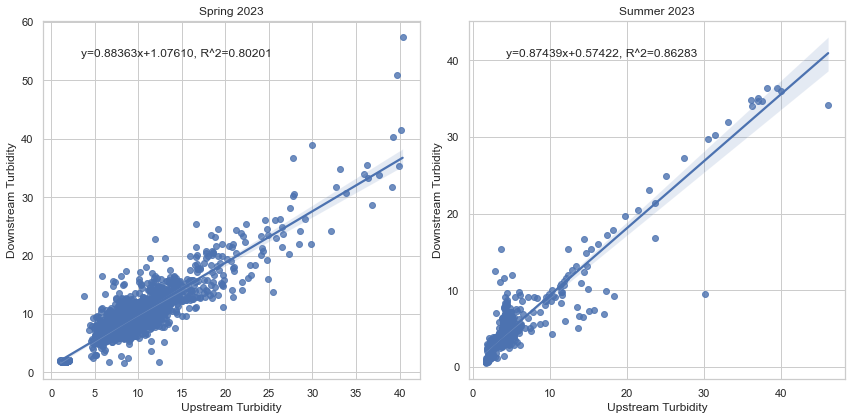

In [38]:
# Set the theme
sns.set_theme(style='whitegrid')

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Spring 2023
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_spring['up_turb'], turbidity_spring['down_turb'])
sns.regplot(x='up_turb', y='down_turb', data=turbidity_spring, ax=axes[0])
axes[0].text(0.1, 0.9, f'y={slope:.5f}x+{intercept:.5f}, R^2={r_value**2:.5f}', transform=axes[0].transAxes)
axes[0].set_title('Spring 2023')
axes[0].set_xlabel('Upstream Turbidity')
axes[0].set_ylabel('Downstream Turbidity')

# Plot 2: Summer 2023
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_summer_2023['up_turb'], turbidity_summer_2023['down_turb'])
sns.regplot(x='up_turb', y='down_turb', data=turbidity_summer_2023, ax=axes[1])
axes[1].text(0.1, 0.9, f'y={slope:.5f}x+{intercept:.5f}, R^2={r_value**2:.5f}', transform=axes[1].transAxes)
axes[1].set_title('Summer 2023')
axes[1].set_xlabel('Upstream Turbidity')
axes[1].set_ylabel('Downstream Turbidity')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('turbidity_comparison.png', dpi=300)

# Show the plot
plt.show()

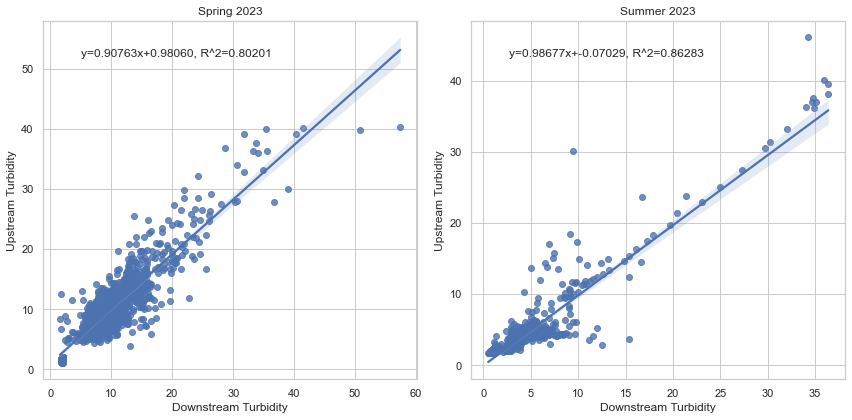

In [39]:
# Set the theme
sns.set_theme(style='whitegrid')

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Spring 2023
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_spring['down_turb'], turbidity_spring['up_turb'])
sns.regplot(x='down_turb', y='up_turb', data=turbidity_spring, ax=axes[0])
axes[0].text(0.1, 0.9, f'y={slope:.5f}x+{intercept:.5f}, R^2={r_value**2:.5f}', transform=axes[0].transAxes)
axes[0].set_title('Spring 2023')
axes[0].set_ylabel('Upstream Turbidity')
axes[0].set_xlabel('Downstream Turbidity')

# Plot 2: Summer 2023
slope, intercept, r_value, p_value, std_err = stats.linregress(turbidity_summer_2023['down_turb'], turbidity_summer_2023['up_turb'])
sns.regplot(x='down_turb', y='up_turb', data=turbidity_summer_2023, ax=axes[1])
axes[1].text(0.1, 0.9, f'y={slope:.5f}x+{intercept:.5f}, R^2={r_value**2:.5f}', transform=axes[1].transAxes)
axes[1].set_title('Summer 2023')
axes[1].set_ylabel('Upstream Turbidity')
axes[1].set_xlabel('Downstream Turbidity')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()